*Questão 01 item b*

Importando as bibliotecas necessárias

In [233]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Pegando os dados e separando uma cópia para trabalho

In [234]:
data = np.genfromtxt("./artificial1d.csv", delimiter=",")
#separando os dados de work
work = data.copy()

Normalizando e separando os dados em X (features) e Y (valores esperados)

In [235]:
means = work.mean(0)
stds = np.sqrt((np.sum((work - means)**2,axis=0))/(work.shape[0] - 1))
work = (work - means)/stds #normalização por z-escore

X = work[:,[0]]
Y = work[:,[1]]

Otimizando os pesos por GD

In [236]:
EPOCHS = 50 #número de iterações do algoritmo
ALPHA = 0.1 #metaparâmetro passo de aprendizado

X = np.concatenate((np.ones((X.shape[0],1)), X), 1)#Concatenando uma coluna de 1 ao X
W = np.ones((2,1)) #inicializando o vetor de pesos como 1

MSE = np.ones((EPOCHS,1)) #inicializando o vetor de erros para plotar depois

for i in range(1, EPOCHS+1):
    Y_pred = X @ W
    error = Y - Y_pred
    MSE[i-1] = np.mean(error**2) #guardando o MSE
    W = W + ALPHA * (X.T @ error) * (1/X.shape[0]) #atualizando os pesos

Plotando o gráfico do erro (curva de aprendizagem)

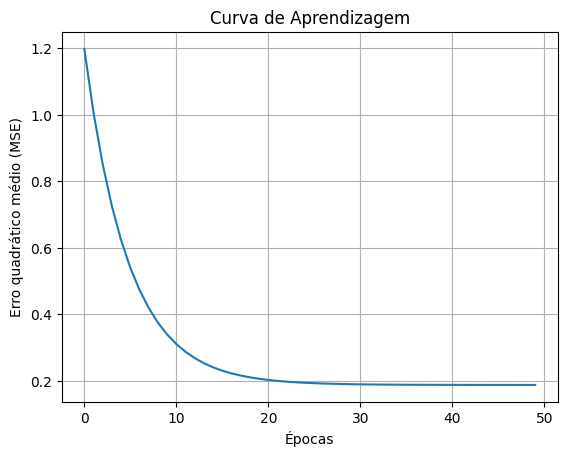

In [237]:
plt.plot(MSE)
plt.xlabel("Épocas")
plt.ylabel("Erro quadrático médio (MSE)")
plt.title("Curva de Aprendizagem")
plt.grid(True)
plt.show()

Plotando o gráfico dos dados

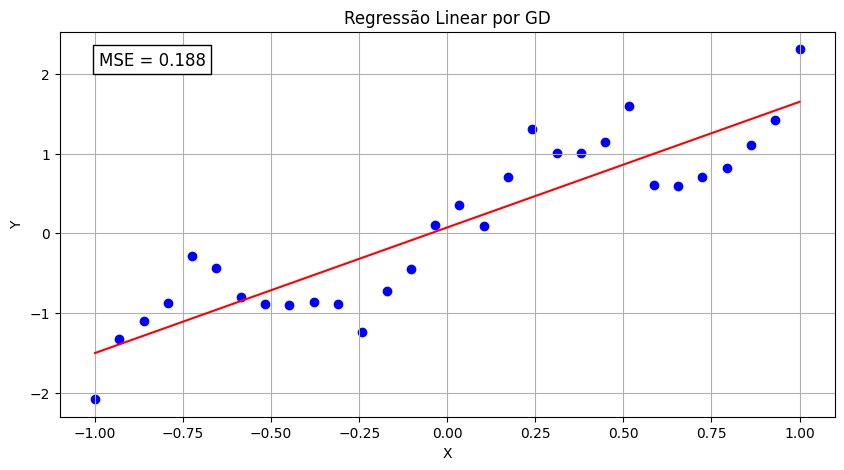

In [238]:
#desnormalizando os dados de treino e as previsões
Y_pred = Y_pred*stds[1] + means[1]
Y = Y*stds[1] + means[1]
X = X[:,1]*stds[0] + means[0]

mse = MSE[EPOCHS-1,0]

# Plotando
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue', label='Dados de treino')
plt.plot(X, Y_pred, color='red', label='Regressão linear (GD)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regressão Linear por GD")
plt.text(0.05, 0.95, f"MSE = {mse:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
plt.grid(True)
plt.show()